## Actividad XG Boost

In [1]:
!pip install xgboost

### Parte 1

- Importar la BD de precios de hogares en Boston
- Dividir en conjuntos de entrenamiento y prueba (80-20) con random_state=1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_boston

%matplotlib inline

In [3]:
boston= load_boston()
y=pd.DataFrame(boston.target, columns=["Target_price"])
X=pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [4]:
y.head()

,Target_price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state=1)

### Parte 2

- Utilizando los parámetros por defecto, comparer el R-cuadrado de los siguientes modelos: KNeighborRegressor, LinearRegression, Lasso, Ridge, ElasticNet, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor.
- Crear un gráfico de barra para observar la comparación de R-cuadrado.

In [7]:
#Knn
knn=KNeighborsRegressor().fit(X_train, y_train)
y_hat_knn= knn.predict(X_test)
y_hat_knn=(y_hat_knn).flatten()

In [8]:
#LinearR
lir=LinearRegression().fit(X_train, y_train)
y_hat_lir= lir.predict(X_test)
y_hat_lir=(y_hat_lir).flatten()

In [9]:
#Lasso
lasso=Lasso().fit(X_train, y_train)
y_hat_lasso= lasso.predict(X_test)
y_hat_lasso=(y_hat_lasso).flatten()

In [10]:
#Ridge
ridge=Ridge().fit(X_train, y_train)
y_hat_ridge= ridge.predict(X_test)
y_hat_ridge=(y_hat_ridge).flatten()

In [11]:
#ElasticNet
elast=ElasticNet().fit(X_train, y_train)
y_hat_elast=elast.predict(X_test)
y_hat_elast=(y_hat_elast).flatten()

In [12]:
#DecisionTree
dtree=DecisionTreeRegressor().fit(X_train, y_train)
y_hat_dtree=dtree.predict(X_test)
y_hat_dtree=(y_hat_dtree).flatten()

In [13]:
#RandomForest
rand=RandomForestRegressor().fit(X_train, y_train)
y_hat_rand= rand.predict(X_test)

C:\Users\CRAMIREZA\AppData\Local\Temp\ipykernel_17248\1360143187.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=RandomForestRegressor().fit(X_train, y_train)


In [14]:
#XGBoost
xgbm=xgb.XGBRegressor().fit(X_train, y_train)
y_hat_xgbm=xgbm.predict(X_test)

In [15]:
df_hats=pd.DataFrame(data=[y_hat_knn, y_hat_lir, y_hat_lasso, y_hat_ridge, y_hat_elast, y_hat_dtree, y_hat_rand, y_hat_xgbm]) #agregar resto de y hats
df_hats

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,30.460000,30.700000,21.720000,26.340000,30.340000,17.660000,37.640000,16.480000,22.540000,24.840000,...,15.160000,20.500000,10.560000,20.440000,21.080000,26.760000,30.680000,22.300000,12.880000,15.840000
1,32.655032,28.093495,18.029018,21.476716,18.825439,19.879978,32.420149,18.065978,24.422778,27.009778,...,14.111315,23.257361,14.663027,21.869772,23.025276,29.089918,37.119379,20.532710,17.368400,17.713993
2,30.798187,28.618170,17.964730,23.055233,24.371706,21.183891,31.741681,20.431533,21.608245,26.300548,...,13.169405,24.900467,16.166091,24.254367,23.268625,27.960598,31.878409,19.661706,16.333786,17.484240
3,32.511398,28.265232,17.528444,21.330290,19.680651,20.055088,32.383830,18.292901,23.712755,26.918769,...,13.420887,23.209437,14.831992,21.782753,23.573650,28.520620,36.926312,20.647504,16.697099,18.279827
4,31.348467,28.679029,17.886279,22.641323,23.889703,20.881180,31.961031,20.232166,21.577539,26.457594,...,12.680099,24.607877,15.742694,23.848455,23.414344,27.887336,32.827784,19.869735,16.228394,17.852816
5,29.900000,29.900000,22.500000,18.900000,18.500000,18.200000,24.500000,19.600000,18.900000,22.000000,...,17.800000,21.200000,21.400000,19.600000,22.800000,22.300000,38.700000,21.200000,13.800000,23.200000
6,30.558000,27.424000,20.160000,20.341000,19.408000,19.868000,27.511000,18.774000,20.803000,23.461000,...,15.923000,21.195000,14.220000,20.717000,23.884000,23.808000,43.401000,20.731000,15.757000,15.225000
7,30.359884,27.026636,19.176161,21.448114,20.703493,20.424747,27.903601,17.878405,21.678137,23.365129,...,15.133404,20.947332,14.996857,20.791437,24.775454,23.958286,45.176277,22.567810,15.780695,16.750847


In [16]:
df_hats=df_hats.T
df_hats.columns=["y_hat_knn", "y_hat_lir", "y_hat_lasso", "y_hat_ridge", "y_hat_elast", "y_hat_dtree", "y_hat_rand", "y_hat_xgbm"]
df_hats

,y_hat_knn,y_hat_lir,y_hat_lasso,y_hat_ridge,y_hat_elast,y_hat_dtree,y_hat_rand,y_hat_xgbm
0,30.46,32.655032,30.798187,32.511398,31.348467,29.9,30.558,30.359884
1,30.70,28.093495,28.618170,28.265232,28.679029,29.9,27.424,27.026636
2,21.72,18.029018,17.964730,17.528444,17.886279,22.5,20.160,19.176161
3,26.34,21.476716,23.055233,21.330290,22.641323,18.9,20.341,21.448114
4,30.34,18.825439,24.371706,19.680651,23.889703,18.5,19.408,20.703493
...,...,...,...,...,...,...,...,...
97,26.76,29.089918,27.960598,28.520620,27.887336,22.3,23.808,23.958286
98,30.68,37.119379,31.878409,36.926312,32.827784,38.7,43.401,45.176277
99,22.30,20.532710,19.661706,20.647504,19.869735,21.2,20.731,22.567810
100,12.88,17.368400,16.333786,16.697099,16.228394,13.8,15.757,15.780695


In [17]:
from sklearn.metrics import r2_score

In [18]:
df_results=[]
for i in df_hats.columns:
    r2=r2_score(y_test, df_hats[i])
    df_results.append(r2)
print(df_results)
#bosque aleatorio y xgb tiene parámetros más cercanos.

[0.5401612153026705, 0.7634174432138463, 0.6399927356461494, 0.7655800611077146, 0.6662534357446656, 0.6856541434500458, 0.9074871132620714, 0.9085331557145866]


In [19]:
df_results= pd.DataFrame(data=df_results)
df_results= df_results.T
df_results.columns=["y_hat_knn", "y_hat_lir", "y_hat_lasso", "y_hat_ridge", "y_hat_elast", "y_hat_dtree", "y_hat_rand", "y_hat_xgbm"]

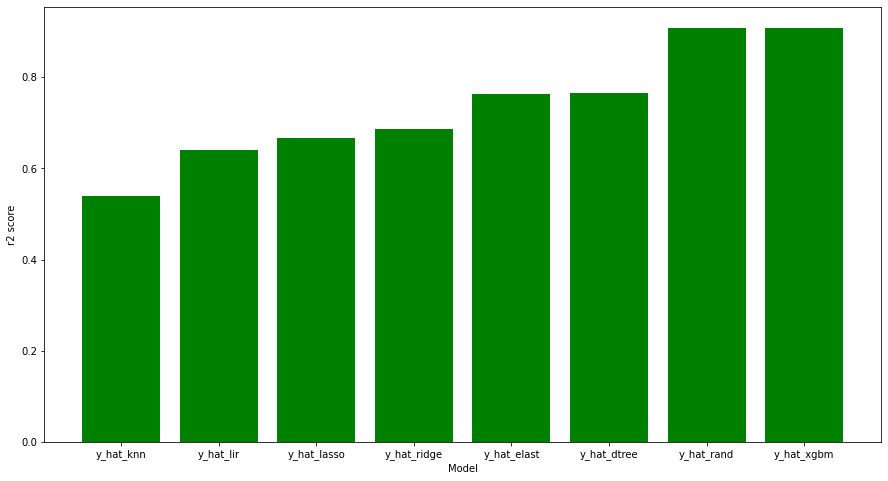

In [20]:
fig, ax= plt.subplots(figsize=(15,8))
plt.bar(df_results.columns, sorted(df_results.T[0]), color="green")
plt.ylabel("r2 score")
plt.xlabel("Model")
plt.show()

- Mejorar los hiperparámetros de cada uno
- Crear un grafico de barra para comparar los modelos mejorados
- ¿Cuál de ellos fue el mejor y el peor?

In [21]:
#Función para hacer un gridsearch
def gs_best(params, model, model_name):
    gs=GridSearchCV(model(), params, cv=5, n_jobs=1, verbose=1)
    gs.fit(X_train, y_train)
    best= model(**gs.best_params_).fit(X_train, y_train)
    y_hat= best.predict(X_test)
    r2=r2_score(y_test, y_hat)
    
    return model_name, r2

In [22]:
knn_params= {"n_neighbors":[3,5,7,9], "metric":["manhattan", "euclidean"], "weights":["uniform", "distance"]}

In [23]:
(model, r2_knn)=gs_best(knn_params, KNeighborsRegressor, "KNN")
r2_knn
#debe dar como 65

Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.6508830800717474

In [24]:
params_xgbm={"max_depth":[4,5], "n_estimators":[10,20,30], "learning_rate":[0.3,0.03]}

In [25]:
(model, r2_xgbm)= gs_best(params_xgbm, xgb.XGBRegressor, "XGBM")
r2_xgbm

Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.9177082576000329

In [26]:
#mejoramiento de hiperparámetros del resto de los modelos:
params_lir={}
params_lasso={"alpha":[0.0001,0.001,0.01, 0.1, 1, 100, 1000, 10000]}
params_ridge={"alpha":[0.0001,0.001,0.01, 0.1, 1, 100, 1000, 10000]}
params_elast={"alpha":[0.0001,0.001,0.01, 0.1, 1, 100, 1000, 10000], "max_iter":[10000]}
params_dtree={"splitter":['best','random'], "max_depth":[1,2,3,4,5]}
params_rand={"max_depth":[1,2,3,4,5]}

In [27]:
(model, r2_lir)= gs_best(params_lir, LinearRegression, "LinearRegression")
r2_lir

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.7634174432138463

In [28]:
(model, r2_lasso)= gs_best(params_lasso, Lasso, "Lasso")
r2_lasso

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.7634260972164932

In [29]:
(model, r2_ridge)= gs_best(params_ridge, Ridge, "Ridge")
r2_ridge

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.7635045352106552

In [30]:
(model, r2_elast)= gs_best(params_elast, ElasticNet, "ElasticNet")
r2_elast

Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.7635941148115567

In [31]:
(model, r2_dtree)= gs_best(params_dtree, DecisionTreeRegressor, "DecisionTree")
r2_dtree

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8587673393049853

In [32]:
(model, r2_rand)= gs_best(params_rand, RandomForestRegressor, "RandomForest")
r2_rand

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\CRAMIREZA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A co

0.9061500285036109

In [33]:
df_results2= pd.DataFrame(data=[r2_knn, r2_lir, r2_lasso, r2_ridge, r2_elast, r2_dtree, r2_rand, r2_xgbm])
df_results2= df_results2.T
df_results2.columns=["knn", "lir", "lasso", "ridge", "elast", "dtree", "rand", "xgbm"]

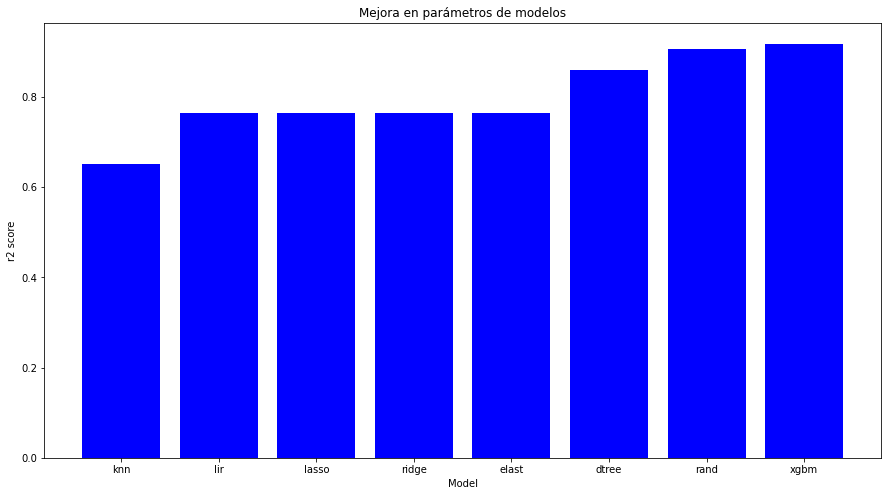

In [34]:
fig, ax= plt.subplots(figsize=(15,8))
plt.bar(df_results2.columns, sorted(df_results2.T[0]), color="blue")
plt.ylabel("r2 score")
plt.xlabel("Model")
plt.title("Mejora en parámetros de modelos")
plt.show()

In [35]:
df_results

,y_hat_knn,y_hat_lir,y_hat_lasso,y_hat_ridge,y_hat_elast,y_hat_dtree,y_hat_rand,y_hat_xgbm
0,0.540161,0.763417,0.639993,0.76558,0.666253,0.685654,0.907487,0.908533


In [36]:
df_results2

,knn,lir,lasso,ridge,elast,dtree,rand,xgbm
0,0.650883,0.763417,0.763426,0.763505,0.763594,0.858767,0.90615,0.917708


En ambos casos, el mejor modelo (considerando su R-cuadrada) es el de XGBoost, seguido de RandomForest. El peor modelo es el de KNN. Los modelos de Regresión mostraron una significativa mejora al ajustar los hiperparámetros.

### Parte 3

- Cambiar el modelo XGBoost para tener un max_depth=1
- Graficar la importancia de las variables

In [37]:
def gs_best1(params, model, model_name):
    gs=GridSearchCV(model(), params, cv=5, n_jobs=1, verbose=1)
    gs.fit(X_train, y_train)
    best= model(**gs.best_params_).fit(X_train, y_train)
    y_hat= best.predict(X_test)
    r2=r2_score(y_test, y_hat)
    
    return best, r2

In [38]:
params_xgbm1={"max_depth":[1], "learning_rate":[0.3,0.03]}
(model1, r2_xgbm1)= gs_best1(params_xgbm1, xgb.XGBRegressor, "XGBM1")
r2_xgbm1

Fitting 5 folds for each of 2 candidates, totalling 10 fits


0.8532663386170671

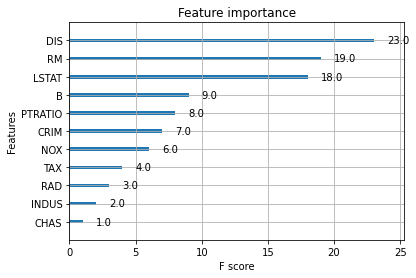

In [39]:
f_imp=xgb.plot_importance(model1)

DIS es la más importante, de acuerdo con el F score.

- Utilizar el modelo XGBoost para graficar los primeros 6 boosted trees

In [40]:
from sklearn.tree import plot_tree

In [41]:
params_xgbm={"max_depth":[4,5], "n_estimators":[10,20,30], "learning_rate":[0.3,0.03]}
(model, r2_xgbm)= gs_best(params_xgbm, xgb.XGBRegressor, "XGBM")
model

Fitting 5 folds for each of 12 candidates, totalling 60 fits


'XGBM'

In [42]:
params_xgbm={'max_depth':5, 'learning_rate':0.3}
data_dmatrix=xgb.DMatrix(data=X_train, label=y_train)

In [43]:
xg_reg=xgb.train(params=params_xgbm, dtrain=data_dmatrix, num_boost_round=10)

In [44]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
import graphviz

In [ ]:
fig, axs= plt.subplots(3,5, figsize=(15,8))
axs= axs.flatten()
for i in range (6):
    tree=model_xgb.n_estimators[i]
    plot_tree(model_xgb.n_estimators[i], max_depth=2, ax=axs[i])

In [47]:
r2_xgb = []
for i in range(1,101):
    yhat = XGBRegressor(n_estimators=i).fit(X_train,y_train).predict(X_test).flatten()
    r2 = r2_score(y_test,yhat)
    r2_xgb.append(r2)

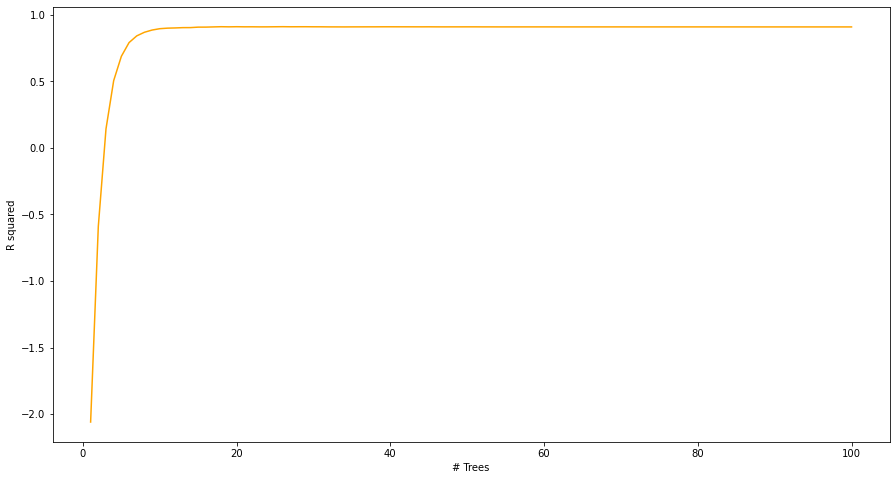

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,101),r2_xgb,color='orange')
plt.ylabel('R squared')
plt.xlabel('# Trees')
plt.show()